# 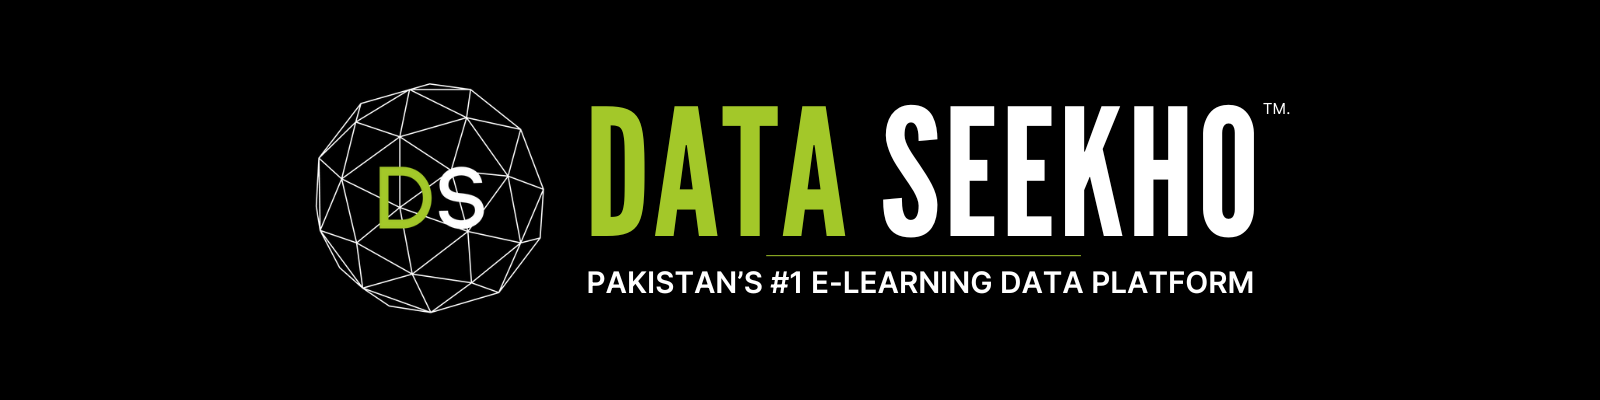

## 🚀 My Short Introduction! 🎓

- **Umama Masroor** is an aspiring data professional at **Data Seekho**.
- 📚 Learning **Python, SQL, Machine Learning**, and more through **Data Seekho’s** courses.
- 💻 Engaging in **hands-on projects** and learning from **industry experts**.
- 🌟 Part of **Data Seekho’s supportive community**, aiming for top 1% in data.
- 🎯 Preparing for a **successful career** in Data Science with **Data Seekho**.

# 📊 Sales Analysis Project: Overview and Objectives

## **Project Objective**
**The goal is to analyze sales data to:**

**Calculate Total Sales Revenue** – Find overall revenue from sales.

**Identify Top 5 Best-Selling Products** – Determine the products sold in the highest quantity.

**Analyze Monthly Sales Trend** – Calculate monthly revenue to observe any sales trends.

**Examine Regional Sales Breakdown** – Analyze which region contributes the most revenue.

**Find the Most Popular Product Category** – Identify the category generating the highest total sales revenue.

## **Project Steps**

Step 1: Set up the environment and load the dataset.

Step 2: Calculate total sales revenue.

Step 3: Identify the top 5 best-selling products.

Step 4: Analyze monthly sales trends.

Step 5: Examine regional sales breakdown.

Step 6: Find the most popular product category.

Step 7: Summarize findings.

💻 **Project Execution**

We'll start by setting up our environment, loading the dataset, and then running SQL queries to answer each question.


**Step 1:** Set Up Environment and Load Dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import sqlite3

# Connecting to SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Creating sample dataset for 'sales_data' table
create_table_query = """
CREATE TABLE sales_data (
    OrderID INTEGER,
    CustomerID INTEGER,
    ProductID INTEGER,
    OrderDate TEXT,
    Quantity INTEGER,
    UnitPrice REAL,
    Region TEXT,
    Category TEXT
);
"""

# Inserting sample data
insert_data_query = """
INSERT INTO sales_data (OrderID, CustomerID, ProductID, OrderDate, Quantity, UnitPrice, Region, Category)
VALUES
    (1, 101, 201, '2024-01-05', 5, 20.00, 'North', 'Electronics'),
    (2, 102, 202, '2024-01-10', 2, 35.00, 'South', 'Home Appliances'),
    (3, 103, 203, '2024-02-15', 1, 120.00, 'East', 'Furniture'),
    (4, 104, 201, '2024-02-20', 10, 20.00, 'West', 'Electronics'),
    (5, 105, 204, '2024-03-01', 7, 50.00, 'North', 'Clothing'),
    (6, 106, 205, '2024-03-15', 4, 80.00, 'South', 'Footwear'),
    (7, 107, 206, '2024-04-05', 3, 100.00, 'East', 'Electronics'),
    (8, 108, 203, '2024-04-15', 2, 120.00, 'West', 'Furniture'),
    (9, 109, 204, '2024-05-05', 1, 50.00, 'North', 'Clothing'),
    (10, 110, 202, '2024-05-10', 8, 35.00, 'South', 'Home Appliances'),
    (11, 111, 207, '2024-06-05', 5, 25.00, 'East', 'Stationery'),
    (12, 112, 201, '2024-06-15', 6, 20.00, 'West', 'Electronics'),
    (13, 113, 208, '2024-07-05', 4, 15.00, 'North', 'Toys'),
    (14, 114, 206, '2024-07-10', 1, 100.00, 'South', 'Electronics'),
    (15, 115, 209, '2024-08-01', 3, 30.00, 'East', 'Books'),
    (16, 116, 210, '2024-08-15', 7, 45.00, 'West', 'Groceries'),
    (17, 117, 211, '2024-09-01', 2, 200.00, 'North', 'Jewelry'),
    (18, 118, 212, '2024-09-10', 5, 18.00, 'South', 'Accessories'),
    (19, 119, 202, '2024-10-01', 4, 35.00, 'East', 'Home Appliances'),
    (20, 120, 201, '2024-10-15', 9, 20.00, 'West', 'Electronics');
"""

# Execute the queries
cursor.execute(create_table_query)
cursor.executescript(insert_data_query)
conn.commit()


**Explanation:**

We created an SQLite in-memory database and connected to it.

We defined the table structure and inserted sample data for analysis.

**Step 2:** Calculate Total Sales Revenue

In [2]:
# SQL query for total revenue
query_total_revenue = """
SELECT SUM(Quantity * UnitPrice) AS Total_Revenue
FROM sales_data;
"""
# Execute and display result
total_revenue = pd.read_sql(query_total_revenue, conn)
total_revenue


,Total_Revenue
0,3650.0


**Explanation:**

This query calculates the total sales revenue by multiplying Quantity and UnitPrice for each row and summing them up.

**Step 3:** Identify Top 5 Best-Selling Products

In [3]:
# SQL query for top 5 best-selling products
query_top_products = """
SELECT ProductID, SUM(Quantity) AS Total_Quantity_Sold
FROM sales_data
GROUP BY ProductID
ORDER BY Total_Quantity_Sold DESC
LIMIT 5;
"""
top_products = pd.read_sql(query_top_products, conn)
top_products


,ProductID,Total_Quantity_Sold
0,201,30
1,202,14
2,204,8
3,210,7
4,212,5


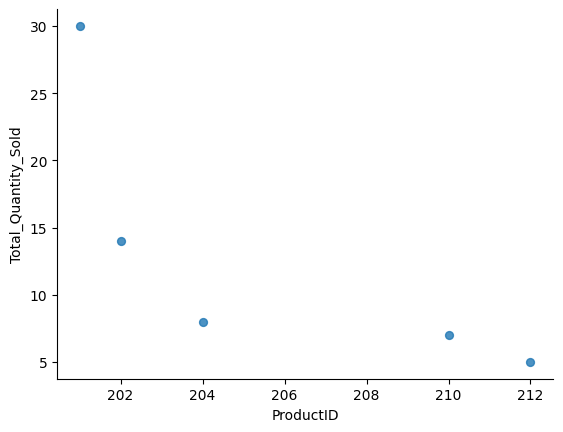

In [4]:
# @title ProductID vs Total_Quantity_Sold

from matplotlib import pyplot as plt
top_products.plot(kind='scatter', x='ProductID', y='Total_Quantity_Sold', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Explanation:**

We use GROUP BY to sum Quantity for each ProductID and then sort to get the top 5 products with the highest sales quantity.


**Step 4:** Analyze Monthly Sales Trend

In [5]:
# SQL query for monthly sales trend
query_monthly_sales = """
SELECT strftime('%Y-%m', OrderDate) AS Month, SUM(Quantity * UnitPrice) AS Monthly_Revenue
FROM sales_data
GROUP BY Month
ORDER BY Month;
"""
monthly_sales = pd.read_sql(query_monthly_sales, conn)
monthly_sales


,Month,Monthly_Revenue
0,2024-01,170.0
1,2024-02,320.0
2,2024-03,670.0
3,2024-04,540.0
4,2024-05,330.0
5,2024-06,245.0
6,2024-07,160.0
7,2024-08,405.0
8,2024-09,490.0
9,2024-10,320.0


**Explanation:**

strftime('%Y-%m', OrderDate) extracts the year and month, grouping data by month to calculate monthly revenue.

**Step 5:** Examine Regional Sales Breakdown

In [7]:
# SQL query for regional sales breakdown
query_regional_sales = """
SELECT Region, SUM(Quantity * UnitPrice) AS Regional_Revenue
FROM sales_data
GROUP BY Region
ORDER BY Regional_Revenue DESC;
"""
regional_sales = pd.read_sql(query_regional_sales, conn)
regional_sales


,Region,Regional_Revenue
0,West,1055.0
1,North,960.0
2,South,860.0
3,East,775.0


**Explanation:**

This query groups data by Region and calculates total revenue for each region, showing which region generates the highest sales.

**Step 6**: Find the Most Popular Product Category

In [8]:
# SQL query for most popular product category
query_popular_category = """
SELECT Category, SUM(Quantity * UnitPrice) AS Category_Revenue
FROM sales_data
GROUP BY Category
ORDER BY Category_Revenue DESC
LIMIT 1;
"""
popular_category = pd.read_sql(query_popular_category, conn)
popular_category


,Category,Category_Revenue
0,Electronics,1000.0


**Explanation:**

We group by Category to sum revenue per category and then select the category with the highest revenue.

 ## **Conclusion of Sales Analysis**
**The Sales Analysis Project provided several valuable insights:**

Total Revenue: We calculated the total revenue generated across all sales, giving a big-picture view of overall earnings. This can help stakeholders assess the company's sales performance.

**Top 5 Best-Selling Products**:

 The analysis identified the products with the highest quantities sold. This information is essential for inventory management, ensuring these popular products are consistently available to meet demand.

**Monthly Sales Trend:**

 By analyzing monthly revenue, we observed sales patterns over time. This trend data helps identify peak sales months, which can guide seasonal marketing efforts and sales promotions.

**Regional Sales Breakdown:**

The regional breakdown highlighted where most sales revenue is generated. Knowing which regions perform best can assist in targeted advertising and resource allocation to areas with high sales potential.

**Most Popular Product Category:**

The category analysis revealed the type of products contributing the most to sales revenue. This insight is useful for product development, guiding which categories may need expansion based on demand.

**Overall Summary**

The analysis provided a data-driven understanding of key sales metrics and trends. These insights can inform strategic decisions, such as marketing focus, stock management, and expansion opportunities. Regularly performing such analysis will allow the business to stay aligned with customer demand, optimize resources, and drive profitability.